In [4]:
import opendatasets as od
# import rarfile, csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [10]:
pd.set_option('display.max_columns', None)

In [3]:
od.download('stackoverflow-developer-survey-2020')

0it [00:00, ?it/s]

94609408it [00:06, 13844185.32it/s]                              
0it [00:00, ?it/s]

16384it [00:00, 45053.06it/s]           
0it [00:00, ?it/s]

8192it [00:00, 26250.43it/s]            


In [11]:
raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [20]:
needed_columns = [#demographics
'Country',
'Age',
'Gender',
'EdLevel',
'UndergradMajor',

#programming experience
'Hobbyist',
'Age1stCode',
'YearsCode',
'YearsCodePro',
'LanguageWorkedWith',
'LanguageDesireNextYear',
'NEWLearn',
'NEWStuck',

#Employment
'Employment',
'DevType',
'WorkWeekHrs',
'JobSat',
'JobFactors',
'NEWOvertime',
'NEWEdImpt']

In [21]:
len(needed_columns)

20

In [22]:
survey_df = raw_df[needed_columns]

survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
survey_df.isnull().sum()

Country                     389
Age                       19015
Gender                    13904
EdLevel                    7030
UndergradMajor            13466
Hobbyist                     45
Age1stCode                 6561
YearsCode                  6777
YearsCodePro              18112
LanguageWorkedWith         7083
LanguageDesireNextYear    10348
NEWLearn                   8305
NEWStuck                   9478
Employment                  607
DevType                   15091
WorkWeekHrs               23310
JobSat                    19267
JobFactors                15112
NEWOvertime               21230
NEWEdImpt                 15996
dtype: int64

In [24]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
Country                   64072 non-null object
Age                       45446 non-null float64
Gender                    50557 non-null object
EdLevel                   57431 non-null object
UndergradMajor            50995 non-null object
Hobbyist                  64416 non-null object
Age1stCode                57900 non-null object
YearsCode                 57684 non-null object
YearsCodePro              46349 non-null object
LanguageWorkedWith        57378 non-null object
LanguageDesireNextYear    54113 non-null object
NEWLearn                  56156 non-null object
NEWStuck                  54983 non-null object
Employment                63854 non-null object
DevType                   49370 non-null object
WorkWeekHrs               41151 non-null float64
JobSat                    45194 non-null object
JobFactors                49349 non-null object
NEWOvertime              

In [26]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [29]:
survey_df['YearsCode'].value_counts()

10                    4510
5                     4249
6                     3834
7                     3477
8                     3407
4                     3254
3                     2951
15                    2586
20                    2562
12                    2453
9                     2344
2                     1916
11                    1691
14                    1479
13                    1468
25                    1338
16                    1203
30                    1114
18                    1089
17                    1057
1                      902
22                     792
Less than 1 year       757
19                     657
35                     599
23                     572
21                     550
40                     535
24                     449
26                     378
27                     335
28                     314
32                     309
38                     289
37                     258
36                     246
33                     236
3

In [30]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'], errors='coerce')

survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')

survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')

<ipython-input-30-a9fe866de3e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'], errors='coerce')
<ipython-input-30-a9fe866de3e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
<ipython-input-30-a9fe866de3e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [31]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
survey_df['YearsCode'].value_counts()

10.0    4510
5.0     4249
6.0     3834
7.0     3477
8.0     3407
4.0     3254
3.0     2951
15.0    2586
20.0    2562
12.0    2453
9.0     2344
2.0     1916
11.0    1691
14.0    1479
13.0    1468
25.0    1338
16.0    1203
30.0    1114
18.0    1089
17.0    1057
1.0      902
22.0     792
19.0     657
35.0     599
23.0     572
21.0     550
40.0     535
24.0     449
26.0     378
27.0     335
28.0     314
32.0     309
38.0     289
37.0     258
36.0     246
33.0     236
34.0     230
29.0     178
39.0     155
31.0     154
42.0     127
45.0     108
41.0      99
43.0      92
44.0      69
46.0      44
50.0      42
48.0      35
47.0      27
49.0      21
Name: YearsCode, dtype: int64

In [34]:
round(survey_df.describe(), 2)

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.00,57473.00,56784.00,44133.00,41151.00
mean,30.83,15.48,12.78,8.87,40.78
std,9.59,5.11,9.49,7.76,17.82
min,1.00,5.00,1.00,1.00,1.00
25%,24.00,12.00,6.00,3.00,40.00
50%,29.00,15.00,10.00,6.00,40.00
75%,35.00,18.00,17.00,12.00,44.00
max,279.00,85.00,50.00,50.00,475.00


In [36]:
survey_df.Gender.value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [46]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), 
                np.nan,
                inplace=True)



C:\Users\langl\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:9275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(


In [50]:
survey_df.Gender.value_counts()

Man                                                  46013
Woman                                                 3844
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [74]:
%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['figure.facecolor'] = "#0000000"

ValueError: Key figure.facecolor: #0000000 does not look like a color arg

In [ ]:
survey_df.Country.value_counts()

In [75]:
survey_df.Country.nunique()

183

In [76]:
top_countries = survey_df.Country.value_counts().head(15)

top_countries

United States         12372
India                  8372
United Kingdom         3883
Germany                3875
Canada                 2177
France                 1889
Brazil                 1811
Netherlands            1335
Poland                 1274
Australia              1199
Spain                  1158
Italy                  1117
Russian Federation     1086
Sweden                  881
Pakistan                803
Name: Country, dtype: int64

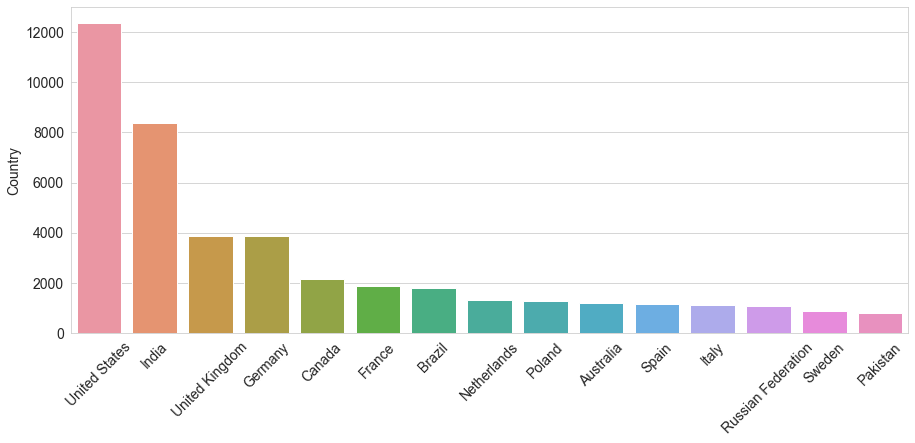

In [79]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(top_countries.index, top_countries)

(array([  209.,  2421.,  9150., 11978.,  8766.,  5600.,  3038.,  1759.,
         1040.,   622.,   333.,   144.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 13 Patch objects>)

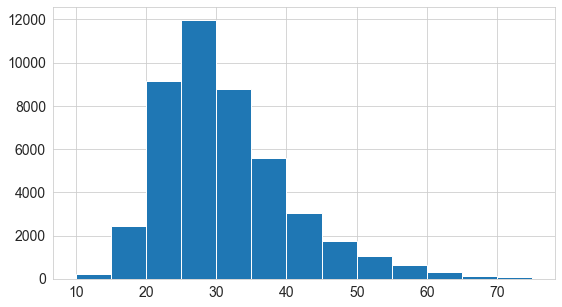

In [85]:
plt.hist(survey_df.Age, bins=np.arange(10,80,5))

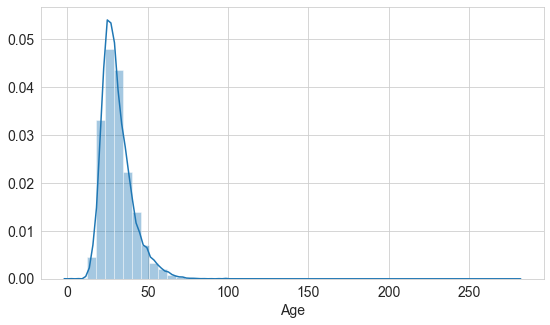

In [88]:
sns.distplot(survey_df.Age, bins=np.arange(10,80,5))

In [84]:
np.arange(10,80,5)

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

In [89]:
gender_counts = survey_df.Gender.value_counts()

([<matplotlib.patches.Wedge at 0x23cb4be2fd0>,
 [Text(-1.0617640585173418, 0.2875014505020509, 'Man'),
  Text(1.0545358315465136, -0.3129763249584597, 'Woman'),
  Text(1.099681264958979, -0.026478585653685063, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(-0.57914403191855, 0.15681897300111863, '91.6%'),
  Text(0.5752013626617346, -0.1707143590682507, '7.7%'),
  Text(0.5998261445230795, -0.014442864902010032, '0.8%')])

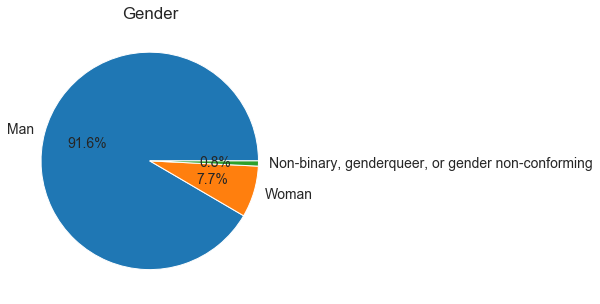

In [98]:
plt.title('Gender')
plt.pie(gender_counts, 
        labels= gender_counts.index,
       autopct='%1.1f%%')

Text(0.5, 1.0, 'Ed Level')

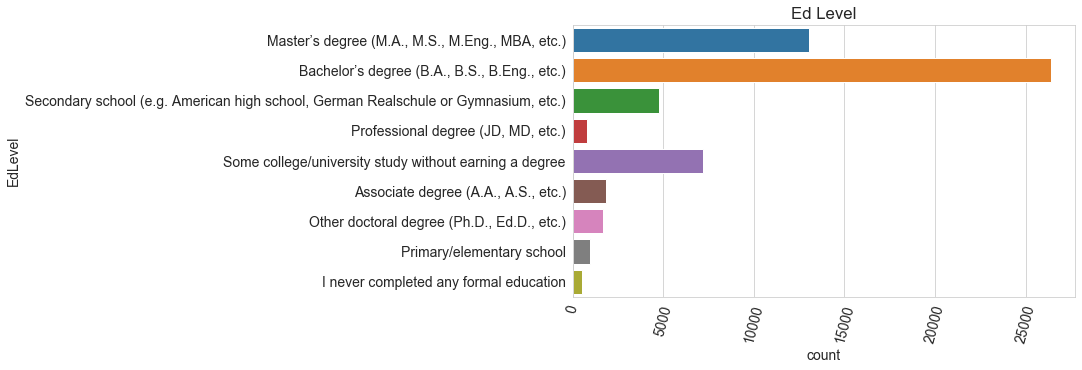

In [107]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title('Ed Level')

Text(0.5, 1.0, 'Ed Level')

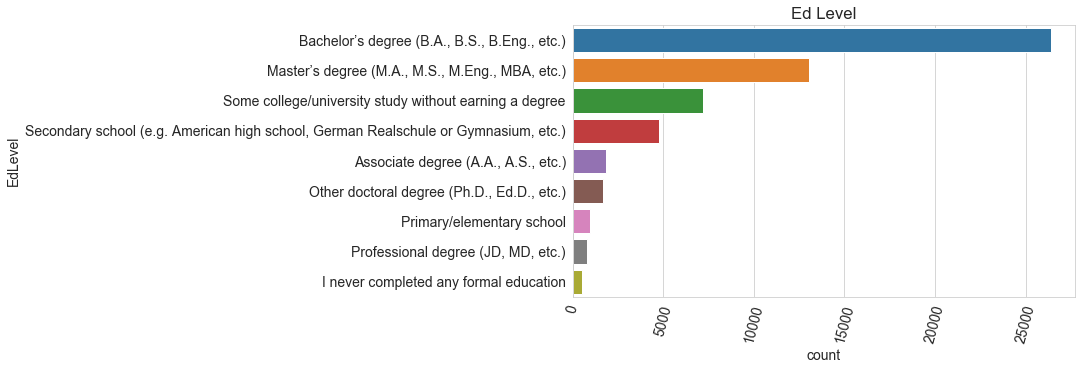

In [113]:
sns.countplot(y=survey_df.EdLevel,
             order=survey_df.EdLevel.value_counts().index)
plt.xticks(rotation=75)
plt.title('Ed Level')

# survey_df.EdLevel.value_counts()

In [112]:
survey_df.EdLevel.value_counts().index

Index(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Professional degree (JD, MD, etc.)',
       'I never completed any formal education'],
      dtype='object')

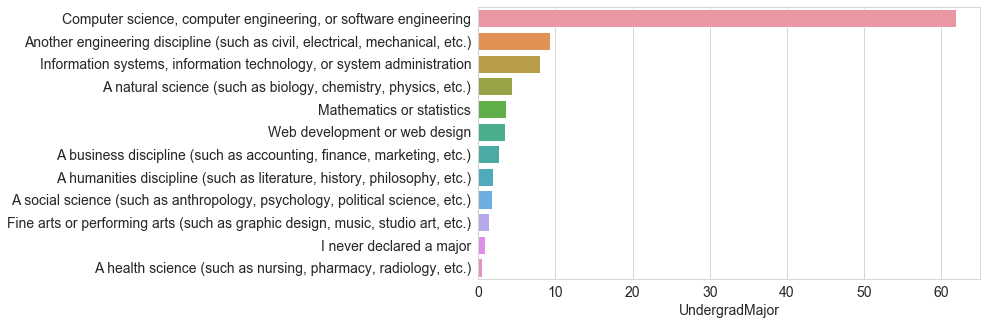

In [120]:
undergrad_pct = survey_df.UndergradMajor.value_counts() / survey_df.UndergradMajor.count() * 100

sns.barplot(undergrad_pct, undergrad_pct.index)

In [118]:
survey_df.UndergradMajor.count()

50739

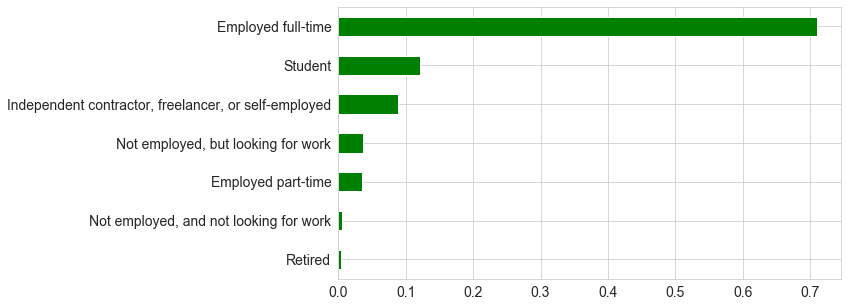

In [128]:
survey_df.Employment.value_counts(normalize=True, ascending=True).plot(kind='barh', color='g')

In [129]:
survey_df['DevType']

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64461, dtype: object